In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Load credit proposals dataset
df_propostas = pd.read_csv('../banvic/seeds/banvic/propostas_credito.csv')
print(f"✅ Loaded {len(df_propostas):,} credit proposal records")

# Convert date column
df_propostas['data_entrada_proposta'] = pd.to_datetime(df_propostas['data_entrada_proposta'], format='mixed')
print("✅ Date column converted successfully")


✅ Loaded 2,000 credit proposal records
✅ Date column converted successfully


# Análise Descrita - Propostas de crédito

In [3]:
print("\n💼 PROPOSTAS DE CRÉDITO ANALYSIS")
print("=" * 50)

# Basic info
print("📋 Basic Information:")
print(f"   - Total credit proposals: {len(df_propostas):,}")
print(f"   - Columns: {list(df_propostas.columns)}")
print(f"   - Missing values: {df_propostas.isnull().sum().sum()}")

# Proposal status
print(f"\n📊 Proposal Status:")
print(df_propostas['status_proposta'].value_counts())

# Financial analysis
print(f"\n💰 Financial Analysis:")
print(f"   - Total proposal value: R$ {df_propostas['valor_proposta'].sum():,.2f}")
print(f"   - Total financing value: R$ {df_propostas['valor_financiamento'].sum():,.2f}")
print(f"   - Total down payment: R$ {df_propostas['valor_entrada'].sum():,.2f}")
print(f"   - Average proposal value: R$ {df_propostas['valor_proposta'].mean():,.2f}")
print(f"   - Average financing value: R$ {df_propostas['valor_financiamento'].mean():,.2f}")
print(f"   - Average down payment: R$ {df_propostas['valor_entrada'].mean():,.2f}")

# Interest rate analysis
print(f"\n📈 Interest Rate Analysis:")
print(f"   - Average monthly interest rate: {df_propostas['taxa_juros_mensal'].mean():.4f} ({df_propostas['taxa_juros_mensal'].mean()*100:.2f}%)")
print(f"   - Interest rate range: {df_propostas['taxa_juros_mensal'].min():.4f} - {df_propostas['taxa_juros_mensal'].max():.4f}")

# Installment analysis
print(f"\n📅 Installment Analysis:")
print(f"   - Average number of installments: {df_propostas['quantidade_parcelas'].mean():.1f}")
print(f"   - Installment range: {df_propostas['quantidade_parcelas'].min()} - {df_propostas['quantidade_parcelas'].max()}")
print(f"   - Average installment value: R$ {df_propostas['valor_prestacao'].mean():,.2f}")

# Grace period analysis
print(f"\n⏰ Grace Period Analysis:")
print(f"   - Average grace period: {df_propostas['carencia'].mean():.1f} months")
print(f"   - Grace period range: {df_propostas['carencia'].min()} - {df_propostas['carencia'].max()} months")
print(f"   - Proposals with grace period: {(df_propostas['carencia'] > 0).sum():,} ({(df_propostas['carencia'] > 0).sum()/len(df_propostas)*100:.1f}%)")

# Timeline analysis
print(f"\n📅 Proposal Timeline:")
print(f"   - First proposal: {df_propostas['data_entrada_proposta'].min()}")
print(f"   - Latest proposal: {df_propostas['data_entrada_proposta'].max()}")
print(f"   - Proposals by year:")
print(df_propostas['data_entrada_proposta'].dt.year.value_counts().sort_index())



💼 PROPOSTAS DE CRÉDITO ANALYSIS
📋 Basic Information:
   - Total credit proposals: 2,000
   - Columns: ['cod_proposta', 'cod_cliente', 'cod_colaborador', 'data_entrada_proposta', 'taxa_juros_mensal', 'valor_proposta', 'valor_financiamento', 'valor_entrada', 'valor_prestacao', 'quantidade_parcelas', 'carencia', 'status_proposta']
   - Missing values: 0

📊 Proposal Status:
status_proposta
Enviada                 527
Aprovada                514
Validação documentos    491
Em análise              468
Name: count, dtype: int64

💰 Financial Analysis:
   - Total proposal value: R$ 167,780,980.14
   - Total financing value: R$ 249,516,711.71
   - Total down payment: R$ 81,735,731.57
   - Average proposal value: R$ 83,890.49
   - Average financing value: R$ 124,758.36
   - Average down payment: R$ 40,867.87

📈 Interest Rate Analysis:
   - Average monthly interest rate: 0.0167 (1.67%)
   - Interest rate range: 0.0080 - 0.0250

📅 Installment Analysis:
   - Average number of installments: 61.2
   

# Visualizações

## Status de proposta de crédito

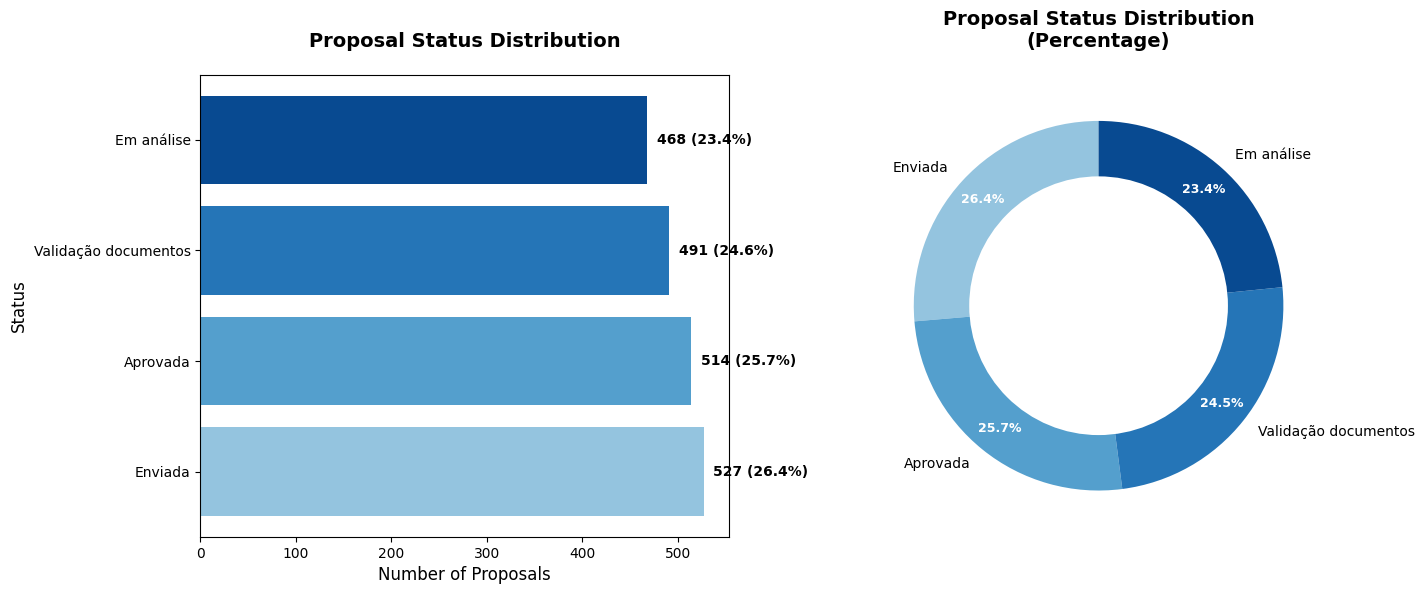

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

status_counts = df_propostas['status_proposta'].value_counts()

colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(status_counts)))

bars = ax1.barh(status_counts.index, status_counts.values, color=colors)
ax1.set_title('Proposal Status Distribution', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Number of Proposals', fontsize=12)
ax1.set_ylabel('Status', fontsize=12)

for i, (bar, value) in enumerate(zip(bars, status_counts.values)):
    ax1.text(bar.get_width() + 10, bar.get_y() + bar.get_height()/2, 
             f'{value:,} ({value/len(df_propostas)*100:.1f}%)', 
             va='center', fontsize=10, fontweight='bold')

wedges, texts, autotexts = ax2.pie(status_counts.values, labels=status_counts.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=90,
                                  pctdistance=0.85, textprops={'fontsize': 10})

centre_circle = plt.Circle((0,0), 0.70, fc='white')
ax2.add_artist(centre_circle)

ax2.set_title('Proposal Status Distribution\n(Percentage)', fontsize=14, fontweight='bold', pad=20)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(9)



## Valor de proposta de crédito em R$

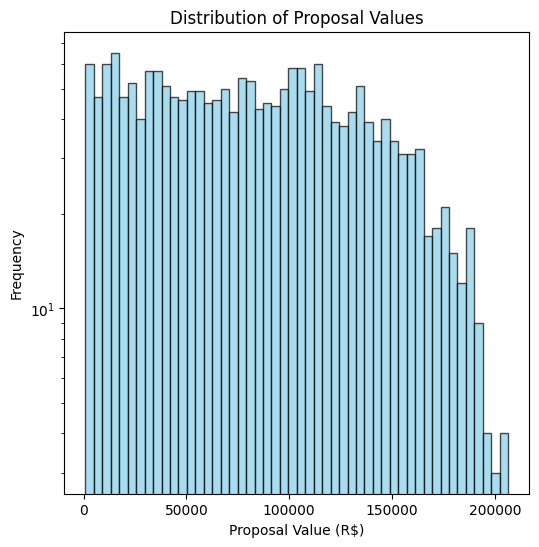

In [10]:
plt.figure(figsize=(6, 6))
plt.hist(df_propostas['valor_proposta'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Proposal Values')
plt.xlabel('Proposal Value (R$)')
plt.ylabel('Frequency')
plt.yscale('log')

## Distribuição de taxa de juros

Text(0, 0.5, 'Frequency')

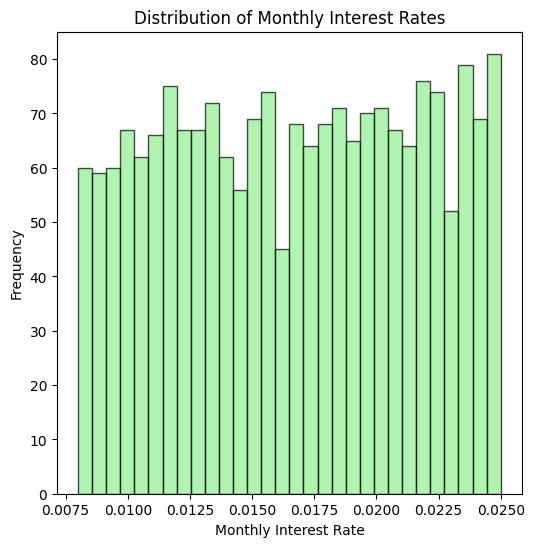

In [11]:
plt.figure(figsize=(6, 6))
plt.hist(df_propostas['taxa_juros_mensal'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Monthly Interest Rates')
plt.xlabel('Monthly Interest Rate')
plt.ylabel('Frequency')

## Número de parcelas

Text(0, 0.5, 'Frequency')

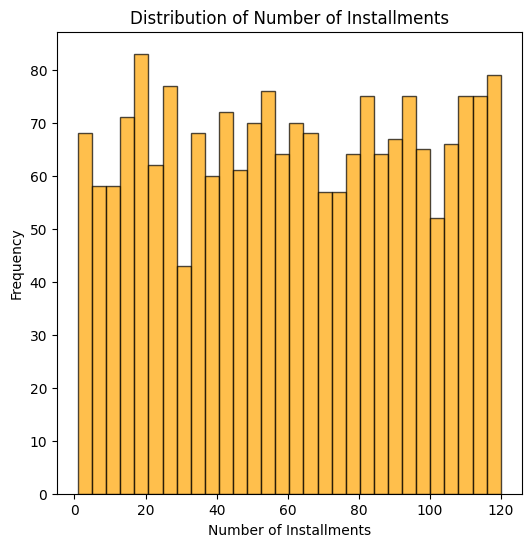

In [12]:
plt.figure(figsize=(6, 6))
plt.hist(df_propostas['quantidade_parcelas'], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribution of Number of Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Frequency')

## Distribuição de propostas de crédito por ano

Text(0, 0.5, 'Number of Proposals')

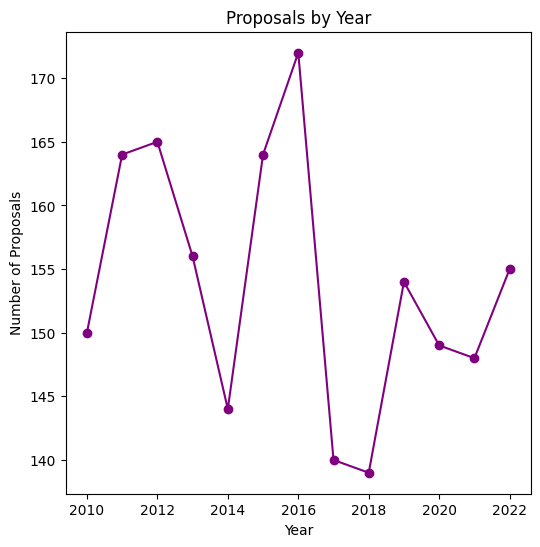

In [13]:
plt.figure(figsize=(6, 6))
df_propostas['data_entrada_proposta'].dt.year.value_counts().sort_index().plot(kind='line', marker='o', color='purple')
plt.title('Proposals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Proposals')


## Taxa de juros por Valor de proposta de crédito

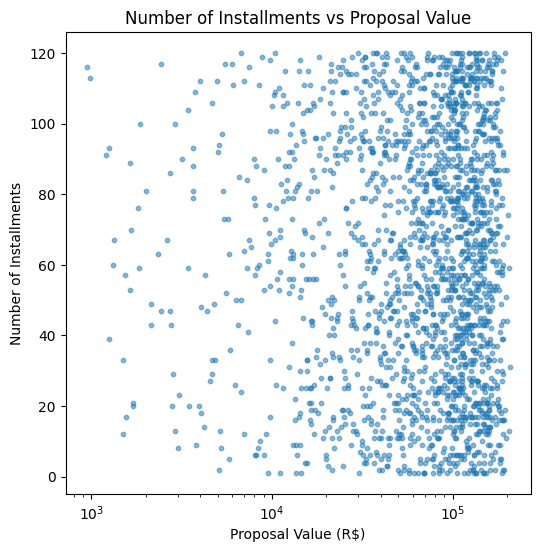

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(df_propostas['valor_proposta'], df_propostas['quantidade_parcelas'], alpha=0.5, s=10)
plt.title('Number of Installments vs Proposal Value')
plt.xlabel('Proposal Value (R$)')
plt.ylabel('Number of Installments')
plt.xscale('log')

## Pagamento de parcelas por Valor de proposta de crédito

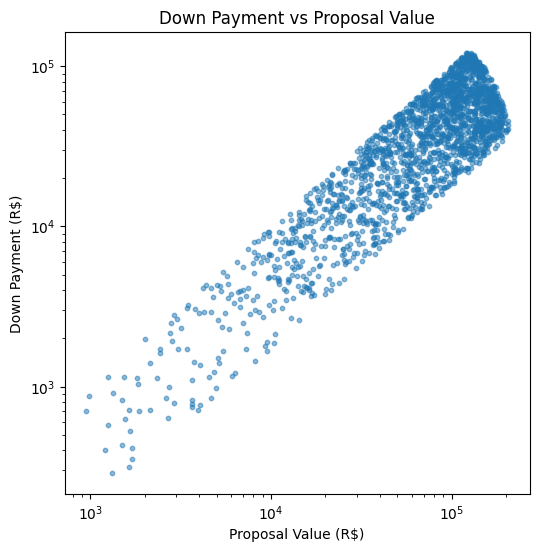

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(df_propostas['valor_proposta'], df_propostas['valor_entrada'], alpha=0.5, s=10)
plt.title('Down Payment vs Proposal Value')
plt.xlabel('Proposal Value (R$)')
plt.ylabel('Down Payment (R$)')
plt.xscale('log')
plt.yscale('log')


## Período de carência

Text(0, 0.5, 'Number of Proposals')

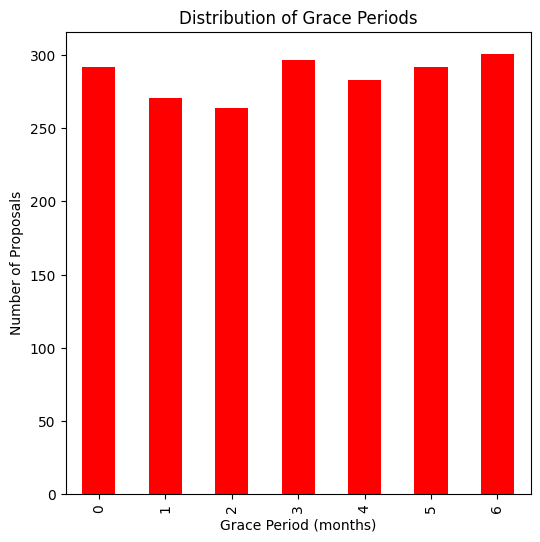

In [16]:
plt.figure(figsize=(6, 6))
df_propostas['carencia'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Distribution of Grace Periods')
plt.xlabel('Grace Period (months)')
plt.ylabel('Number of Proposals')


## Pagamentos mensais

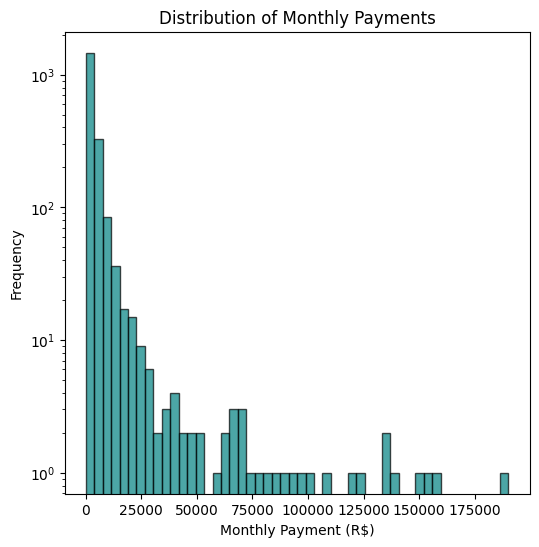

In [17]:
plt.figure(figsize=(6, 6))
plt.hist(df_propostas['valor_prestacao'], bins=50, alpha=0.7, color='teal', edgecolor='black')
plt.title('Distribution of Monthly Payments')
plt.xlabel('Monthly Payment (R$)')
plt.ylabel('Frequency')
plt.yscale('log')

## Valor proposta de crédito por Status

Text(0.5, 0.98, '')

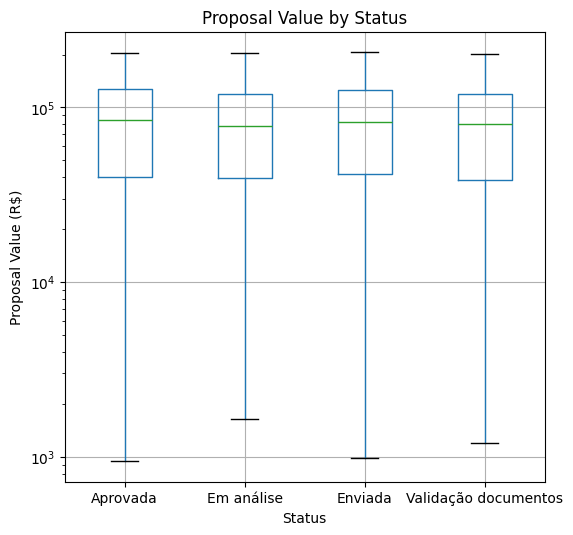

In [18]:
plt.figure(figsize=(6, 6))
df_propostas.boxplot(column='valor_proposta', by='status_proposta', ax=plt.gca())
plt.title('Proposal Value by Status')
plt.xlabel('Status')
plt.ylabel('Proposal Value (R$)')
plt.yscale('log')
plt.suptitle('')  # Remove default title

## Taxa de juros por Status

Text(0.5, 0.98, '')

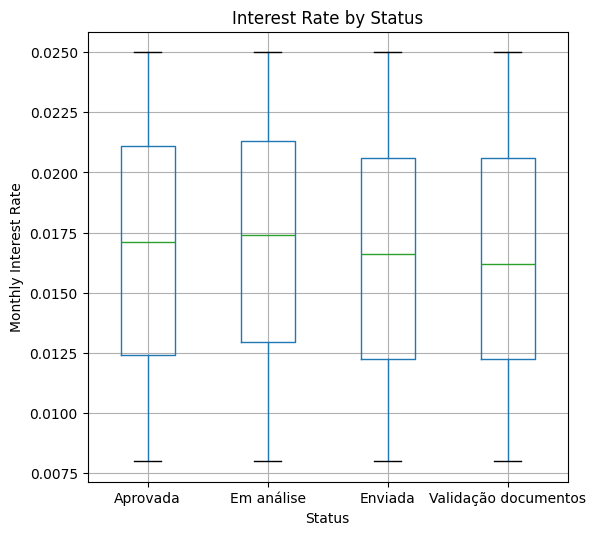

In [20]:
plt.figure(figsize=(6, 6))
df_propostas.boxplot(column='taxa_juros_mensal', by='status_proposta', ax=plt.gca())
plt.title('Interest Rate by Status')
plt.xlabel('Status')
plt.ylabel('Monthly Interest Rate')
plt.suptitle('')  # Remove default title

## Valor de financiamento por Valor proposta de crédito

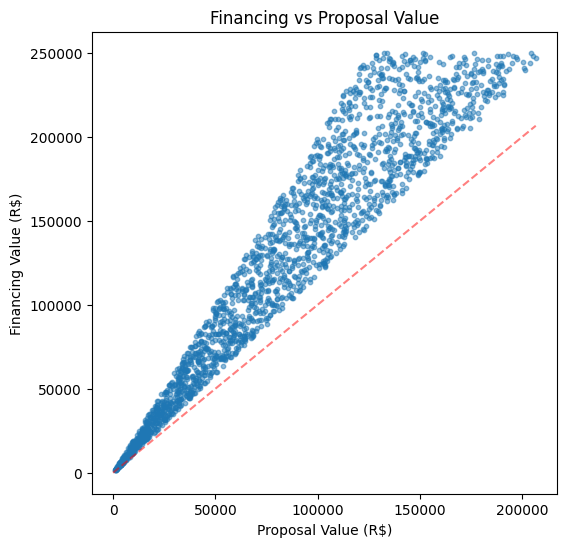

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(df_propostas['valor_proposta'], df_propostas['valor_financiamento'], alpha=0.5, s=10)
plt.title('Financing vs Proposal Value')
plt.xlabel('Proposal Value (R$)')
plt.ylabel('Financing Value (R$)')
plt.plot([0, df_propostas['valor_proposta'].max()], [0, df_propostas['valor_proposta'].max()], 'r--', alpha=0.5)

## Propostas de crédito mensais

C:\Users\guizsantos\AppData\Local\Temp\ipykernel_20396\1980868251.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_props = df_propostas['data_entrada_proposta'].dt.to_period('M').value_counts().sort_index()


(array([492, 516, 540, 564, 588, 612]),
 [Text(492, 0, '2011'),
  Text(516, 0, '2013'),
  Text(540, 0, '2015'),
  Text(564, 0, '2017'),
  Text(588, 0, '2019'),
  Text(612, 0, '2021')])

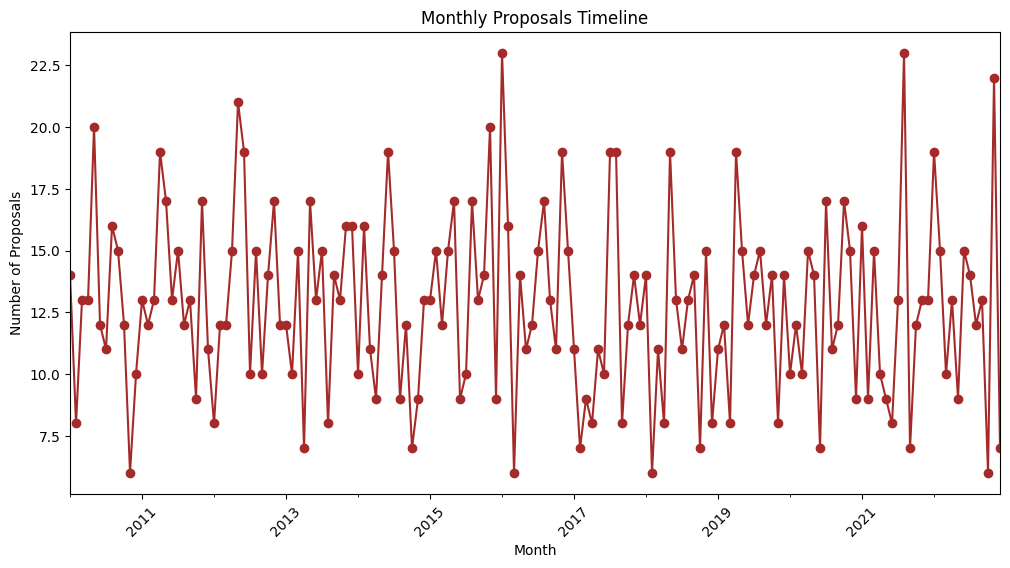

In [24]:
plt.figure(figsize=(12, 6))
monthly_props = df_propostas['data_entrada_proposta'].dt.to_period('M').value_counts().sort_index()
monthly_props.plot(kind='line', marker='o', color='brown')
plt.title('Monthly Proposals Timeline')
plt.xlabel('Month')
plt.ylabel('Number of Proposals')
plt.xticks(rotation=45)

## Pagamento de parcelas em percentual

Text(0, 0.5, 'Frequency')

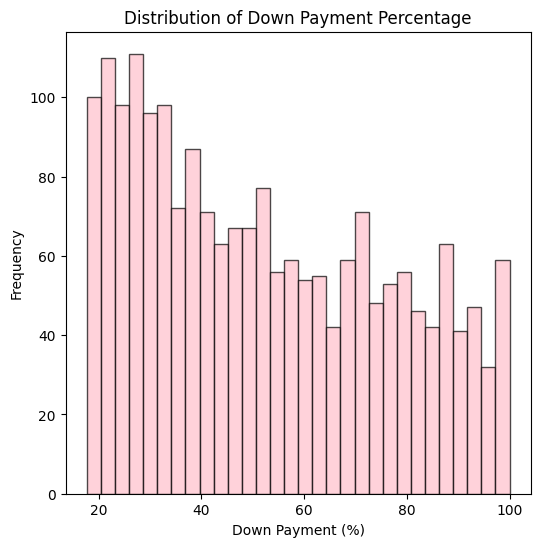

In [25]:
plt.figure(figsize=(6, 6))
df_propostas['down_payment_pct'] = (df_propostas['valor_entrada'] / df_propostas['valor_proposta']) * 100
plt.hist(df_propostas['down_payment_pct'], bins=30, alpha=0.7, color='pink', edgecolor='black')
plt.title('Distribution of Down Payment Percentage')
plt.xlabel('Down Payment (%)')
plt.ylabel('Frequency')

## Taxa de juros por Parcelas

Text(0, 0.5, 'Monthly Interest Rate')

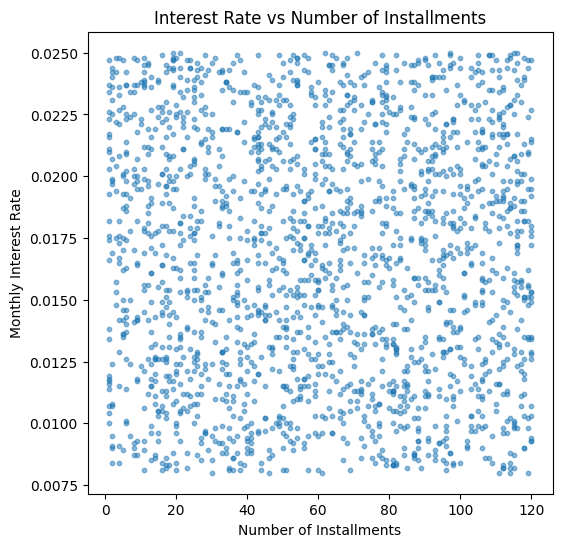

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(df_propostas['quantidade_parcelas'], df_propostas['taxa_juros_mensal'], alpha=0.5, s=10)
plt.title('Interest Rate vs Number of Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Monthly Interest Rate')


## Resumo

In [27]:
# Summary statistics
print(f"\n📊 Summary Statistics:")
print(f"   - Total proposal value: R$ {df_propostas['valor_proposta'].sum():,.2f}")
print(f"   - Total financing value: R$ {df_propostas['valor_financiamento'].sum():,.2f}")
print(f"   - Average proposal value: R$ {df_propostas['valor_proposta'].mean():,.2f}")
print(f"   - Average interest rate: {df_propostas['taxa_juros_mensal'].mean()*100:.2f}%")
print(f"   - Average number of installments: {df_propostas['quantidade_parcelas'].mean():.1f}")
print(f"   - Average down payment percentage: {df_propostas['down_payment_pct'].mean():.1f}%")
print(f"   - Most common status: {df_propostas['status_proposta'].value_counts().index[0]}")
print(f"   - Proposals with grace period: {(df_propostas['carencia'] > 0).sum():,} ({(df_propostas['carencia'] > 0).sum()/len(df_propostas)*100:.1f}%)")
print(f"   - Average grace period: {df_propostas['carencia'].mean():.1f} months")



📊 Summary Statistics:
   - Total proposal value: R$ 167,780,980.14
   - Total financing value: R$ 249,516,711.71
   - Average proposal value: R$ 83,890.49
   - Average interest rate: 1.67%
   - Average number of installments: 61.2
   - Average down payment percentage: 52.4%
   - Most common status: Enviada
   - Proposals with grace period: 1,708 (85.4%)
   - Average grace period: 3.0 months
